In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from statsmodels.tsa.statespace.varmax import VARMAX


drive.mount('/content/drive', force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import datetime as dt
from datetime import datetime

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NBA_Models/lakers_augmented_data_{timestamp}.csv'.format(timestamp=datetime.now().strftime('%m-%d-%Y')), index_col=0)

In [ ]:
df

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,...,PF,PTS,GmSc,+/-,Game,Home,Final_Score_Delta,PERSON_ID,TEAM_ID,Played
0,00:37:35,11.0,23.0,0.478,1.0,3.0,0.333,13.0,15.0,0.867,...,1.0,36.0,34.0,1.0,1,0,7,203076,1610612750,1
1,00:36:02,6.0,14.0,0.429,0.0,5.0,0.000,0.0,1.0,0.000,...,4.0,12.0,11.4,12.0,1,0,7,1630559,1610612750,1
2,00:35:05,7.0,14.0,0.500,1.0,4.0,0.250,3.0,4.0,0.750,...,2.0,18.0,15.9,19.0,1,0,7,1629060,1610612750,1
3,00:34:39,7.0,16.0,0.438,1.0,4.0,0.250,1.0,1.0,1.000,...,3.0,16.0,10.1,-6.0,1,0,7,2544,1610612750,1
4,00:34:13,4.0,12.0,0.333,1.0,7.0,0.143,0.0,0.0,NaN,...,2.0,9.0,6.2,15.0,1,0,7,1626156,1610612750,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,00:13:29,0.0,3.0,0.000,0.0,2.0,0.000,2.0,2.0,1.000,...,1.0,2.0,3.2,1.0,34,0,-4,1629003,1610612737,1
391,00:12:50,1.0,2.0,0.500,1.0,2.0,0.500,0.0,0.0,NaN,...,1.0,3.0,3.0,1.0,34,0,-4,1629629,1610612737,1
392,00:10:42,1.0,2.0,0.500,0.0,0.0,NaN,1.0,2.0,0.500,...,0.0,3.0,1.9,0.0,34,0,-4,1629637,1610612737,1
393,00:01:41,0.0,1.0,0.000,0.0,0.0,NaN,0.0,0.0,NaN,...,0.0,0.0,0.0,2.0,34,0,-4,1642355,1610612737,1


In [ ]:
df['MP'] = df['MP'].fillna(pd.to_datetime('00:00:00').time())
df.fillna(0, inplace=True)

In [ ]:
df

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,...,PF,PTS,GmSc,+/-,Game,Home,Final_Score_Delta,PERSON_ID,TEAM_ID,Played
0,00:37:35,11.0,23.0,0.478,1.0,3.0,0.333,13.0,15.0,0.867,...,1.0,36.0,34.0,1.0,1,0,7,203076,1610612750,1
1,00:36:02,6.0,14.0,0.429,0.0,5.0,0.000,0.0,1.0,0.000,...,4.0,12.0,11.4,12.0,1,0,7,1630559,1610612750,1
2,00:35:05,7.0,14.0,0.500,1.0,4.0,0.250,3.0,4.0,0.750,...,2.0,18.0,15.9,19.0,1,0,7,1629060,1610612750,1
3,00:34:39,7.0,16.0,0.438,1.0,4.0,0.250,1.0,1.0,1.000,...,3.0,16.0,10.1,-6.0,1,0,7,2544,1610612750,1
4,00:34:13,4.0,12.0,0.333,1.0,7.0,0.143,0.0,0.0,0.000,...,2.0,9.0,6.2,15.0,1,0,7,1626156,1610612750,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,00:13:29,0.0,3.0,0.000,0.0,2.0,0.000,2.0,2.0,1.000,...,1.0,2.0,3.2,1.0,34,0,-4,1629003,1610612737,1
391,00:12:50,1.0,2.0,0.500,1.0,2.0,0.500,0.0,0.0,0.000,...,1.0,3.0,3.0,1.0,34,0,-4,1629629,1610612737,1
392,00:10:42,1.0,2.0,0.500,0.0,0.0,0.000,1.0,2.0,0.500,...,0.0,3.0,1.9,0.0,34,0,-4,1629637,1610612737,1
393,00:01:41,0.0,1.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,0.0,2.0,34,0,-4,1642355,1610612737,1


In [ ]:
y = df[['Game', 'Final_Score_Delta']].set_index('Game').groupby('Game').agg('max')

unflatten_X = pd.get_dummies(df[['PERSON_ID', 'TEAM_ID']].astype(str)) # Use double square brackets to select multiple columns
unflatten_X['MP'] = df['MP'].apply(lambda x: pd.to_datetime(str(x)).time())
unflatten_X['Home'] = df['Home']
unflatten_X['Game'] = df['Game']

In [ ]:
unflatten_X

,PERSON_ID_1626156,PERSON_ID_1626174,PERSON_ID_1627827,PERSON_ID_1629003,PERSON_ID_1629020,PERSON_ID_1629060,PERSON_ID_1629216,PERSON_ID_1629629,PERSON_ID_1629637,PERSON_ID_1630559,...,TEAM_ID_1610612758,TEAM_ID_1610612759,TEAM_ID_1610612760,TEAM_ID_1610612761,TEAM_ID_1610612762,TEAM_ID_1610612763,TEAM_ID_1610612765,MP,Home,Game
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,00:37:35,0,1
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,00:36:02,0,1
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,00:35:05,0,1
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,00:34:39,0,1
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,00:34:13,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,00:13:29,0,34
391,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,00:12:50,0,34
392,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,00:10:42,0,34
393,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,00:01:41,0,34


In [ ]:
y

,Final_Score_Delta
Game,
1,7
2,4
3,-4
4,-24
5,6
6,-12
7,-17
8,10
9,20


In [ ]:
unflatten_X['MP'] = unflatten_X['MP'].apply(lambda x: (x.hour * 60 + x.minute * 60 + x.second) if isinstance(x, dt.time) else x)

# Ensure all columns in X and y are numeric
unflatten_X = unflatten_X.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)  # Convert to numeric, fill NaNs with 0
unflatten_X['Game'] = unflatten_X['Game'].astype(int)  # Convert to numeric, fill NaNs with 0

In [ ]:
unflatten_X

,PERSON_ID_1626156,PERSON_ID_1626174,PERSON_ID_1627827,PERSON_ID_1629003,PERSON_ID_1629020,PERSON_ID_1629060,PERSON_ID_1629216,PERSON_ID_1629629,PERSON_ID_1629637,PERSON_ID_1630559,...,TEAM_ID_1610612758,TEAM_ID_1610612759,TEAM_ID_1610612760,TEAM_ID_1610612761,TEAM_ID_1610612762,TEAM_ID_1610612763,TEAM_ID_1610612765,MP,Home,Game
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2255.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2162.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2105.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2079.0,0.0,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2053.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,809.0,0.0,34
391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,770.0,0.0,34
392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,642.0,0.0,34
393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,0.0,34


In [ ]:
unflatten_X.set_index('Game', inplace=True)
unflatten_X

,PERSON_ID_1626156,PERSON_ID_1626174,PERSON_ID_1627827,PERSON_ID_1629003,PERSON_ID_1629020,PERSON_ID_1629060,PERSON_ID_1629216,PERSON_ID_1629629,PERSON_ID_1629637,PERSON_ID_1630559,...,TEAM_ID_1610612757,TEAM_ID_1610612758,TEAM_ID_1610612759,TEAM_ID_1610612760,TEAM_ID_1610612761,TEAM_ID_1610612762,TEAM_ID_1610612763,TEAM_ID_1610612765,MP,Home
Game,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2255.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2162.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2105.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2079.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2053.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,809.0,0.0
34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,770.0,0.0
34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,642.0,0.0


In [ ]:
player_columns = [col for col in unflatten_X.columns if 'PERSON_ID' in col]
X = pd.DataFrame()

for col in player_columns:
    new_col_name = col.replace('PERSON_ID_', 'MP_PLAYER_')
    X[new_col_name] = unflatten_X[col] * unflatten_X['MP']

X = X.groupby('Game').sum()
X

,MP_PLAYER_1626156,MP_PLAYER_1626174,MP_PLAYER_1627827,MP_PLAYER_1629003,MP_PLAYER_1629020,MP_PLAYER_1629060,MP_PLAYER_1629216,MP_PLAYER_1629629,MP_PLAYER_1629637,MP_PLAYER_1630559,MP_PLAYER_1631108,MP_PLAYER_1631132,MP_PLAYER_1641720,MP_PLAYER_1641721,MP_PLAYER_1642261,MP_PLAYER_1642355,MP_PLAYER_1642439,MP_PLAYER_203076,MP_PLAYER_2544
Game,,,,,,,,,,,,,,,,,,,
1,2053.0,0.0,0.0,0.0,0.0,2105.0,1033.0,0.0,920.0,2162.0,685.0,0.0,0.0,0.0,947.0,161.0,0.0,2255.0,2079.0
2,1757.0,0.0,0.0,0.0,0.0,2341.0,1235.0,0.0,1052.0,2199.0,685.0,0.0,0.0,0.0,799.0,0.0,0.0,2250.0,2082.0
3,1948.0,0.0,0.0,0.0,0.0,2240.0,757.0,0.0,868.0,2012.0,1074.0,0.0,0.0,0.0,1210.0,0.0,0.0,2265.0,2026.0
4,1999.0,0.0,0.0,0.0,0.0,1881.0,1157.0,0.0,750.0,2271.0,1390.0,0.0,0.0,0.0,674.0,0.0,0.0,2130.0,2148.0
5,1448.0,0.0,0.0,0.0,0.0,1697.0,969.0,553.0,1144.0,1670.0,1636.0,0.0,0.0,0.0,1349.0,316.0,0.0,1880.0,1738.0
6,1948.0,0.0,0.0,0.0,0.0,1993.0,1232.0,0.0,902.0,2058.0,795.0,0.0,0.0,0.0,1147.0,7.0,0.0,2143.0,2175.0
7,1982.0,0.0,0.0,0.0,0.0,2086.0,1066.0,841.0,551.0,2361.0,252.0,0.0,0.0,0.0,521.0,0.0,0.0,2340.0,2400.0
8,1293.0,0.0,0.0,0.0,0.0,0.0,1401.0,1556.0,2080.0,2096.0,1162.0,800.0,0.0,0.0,1612.0,275.0,0.0,0.0,2125.0
9,1524.0,0.0,0.0,0.0,0.0,1970.0,940.0,1669.0,934.0,1796.0,88.0,88.0,88.0,88.0,970.0,88.0,0.0,2129.0,2028.0


In [ ]:
remaining_columns = [col for col in unflatten_X.columns if 'TEAM_ID' in col or 'Home' in col]

X=X.join(unflatten_X[remaining_columns].drop_duplicates(), on='Game').rename(columns={col: col.replace('TEAM_ID_', 'TEAM_') for col in remaining_columns})

team_columns = [col for col in X.columns if 'TEAM_' in col]


for col in team_columns:
    new_col_name = col.replace('TEAM_', 'HomexTEAM_')
    X[new_col_name] = X[col] * X['Home']


mp_player_cols = [col for col in X.columns if 'MP_PLAYER_' in col]
cols_to_keep = ['MP_PLAYER_2544', 'MP_PLAYER_203076']

cols_to_remove = [col for col in mp_player_cols if col not in cols_to_keep]
X = X.drop(columns=cols_to_remove)

X

,MP_PLAYER_203076,MP_PLAYER_2544,TEAM_1610612737,TEAM_1610612739,TEAM_1610612740,TEAM_1610612743,TEAM_1610612744,TEAM_1610612748,TEAM_1610612750,TEAM_1610612753,...,HomexTEAM_1610612755,HomexTEAM_1610612756,HomexTEAM_1610612757,HomexTEAM_1610612758,HomexTEAM_1610612759,HomexTEAM_1610612760,HomexTEAM_1610612761,HomexTEAM_1610612762,HomexTEAM_1610612763,HomexTEAM_1610612765
Game,,,,,,,,,,,,,,,,,,,,,
1,2255.0,2079.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2250.0,2082.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2265.0,2026.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2130.0,2148.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1880.0,1738.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2143.0,2175.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,2340.0,2400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,2125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,2129.0,2028.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X.columns

Index(['MP_PLAYER_203076', 'MP_PLAYER_2544', 'TEAM_1610612737',
       'TEAM_1610612739', 'TEAM_1610612740', 'TEAM_1610612743',
       'TEAM_1610612744', 'TEAM_1610612748', 'TEAM_1610612750',
       'TEAM_1610612753', 'TEAM_1610612755', 'TEAM_1610612756',
       'TEAM_1610612757', 'TEAM_1610612758', 'TEAM_1610612759',
       'TEAM_1610612760', 'TEAM_1610612761', 'TEAM_1610612762',
       'TEAM_1610612763', 'TEAM_1610612765', 'Home', 'HomexTEAM_1610612737',
       'HomexTEAM_1610612739', 'HomexTEAM_1610612740', 'HomexTEAM_1610612743',
       'HomexTEAM_1610612744', 'HomexTEAM_1610612748', 'HomexTEAM_1610612750',
       'HomexTEAM_1610612753', 'HomexTEAM_1610612755', 'HomexTEAM_1610612756',
       'HomexTEAM_1610612757', 'HomexTEAM_1610612758', 'HomexTEAM_1610612759',
       'HomexTEAM_1610612760', 'HomexTEAM_1610612761', 'HomexTEAM_1610612762',
       'HomexTEAM_1610612763', 'HomexTEAM_1610612765'],
      dtype='object')

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 1 to 34
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Final_Score_Delta  34 non-null     int64
dtypes: int64(1)
memory usage: 544.0 bytes


In [ ]:
y

,Final_Score_Delta
Game,
1,7
2,4
3,-4
4,-24
5,6
6,-12
7,-17
8,10
9,20


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 1 to 34
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MP_PLAYER_203076      34 non-null     float64
 1   MP_PLAYER_2544        34 non-null     float64
 2   TEAM_1610612737       27 non-null     float64
 3   TEAM_1610612739       27 non-null     float64
 4   TEAM_1610612740       27 non-null     float64
 5   TEAM_1610612743       27 non-null     float64
 6   TEAM_1610612744       27 non-null     float64
 7   TEAM_1610612748       27 non-null     float64
 8   TEAM_1610612750       27 non-null     float64
 9   TEAM_1610612753       27 non-null     float64
 10  TEAM_1610612755       27 non-null     float64
 11  TEAM_1610612756       27 non-null     float64
 12  TEAM_1610612757       27 non-null     float64
 13  TEAM_1610612758       27 non-null     float64
 14  TEAM_1610612759       27 non-null     float64
 15  TEAM_1610612760       27 non-n

In [ ]:
X.fillna(0, inplace=True)
X[:24]

,MP_PLAYER_203076,MP_PLAYER_2544,TEAM_1610612737,TEAM_1610612739,TEAM_1610612740,TEAM_1610612743,TEAM_1610612744,TEAM_1610612748,TEAM_1610612750,TEAM_1610612753,...,HomexTEAM_1610612755,HomexTEAM_1610612756,HomexTEAM_1610612757,HomexTEAM_1610612758,HomexTEAM_1610612759,HomexTEAM_1610612760,HomexTEAM_1610612761,HomexTEAM_1610612762,HomexTEAM_1610612763,HomexTEAM_1610612765
Game,,,,,,,,,,,,,,,,,,,,,
1,2255.0,2079.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2250.0,2082.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2265.0,2026.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2130.0,2148.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1880.0,1738.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2143.0,2175.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,2340.0,2400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,2125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,2129.0,2028.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from statsmodels.regression.linear_model import OLS

In [ ]:
model = OLS(y, X) # You might need to adjust the order
results = model.fit()

# Print model summary
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:      Final_Score_Delta   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.382
Method:                 Least Squares   F-statistic:                              1.723
Date:                Tue, 07 Jan 2025   Prob (F-statistic):                       0.285
Time:                        23:07:38   Log-Likelihood:                         -98.135
No. Observations:                  34   AIC:                                      254.3
Df Residuals:                       5   BIC:                                      298.5
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

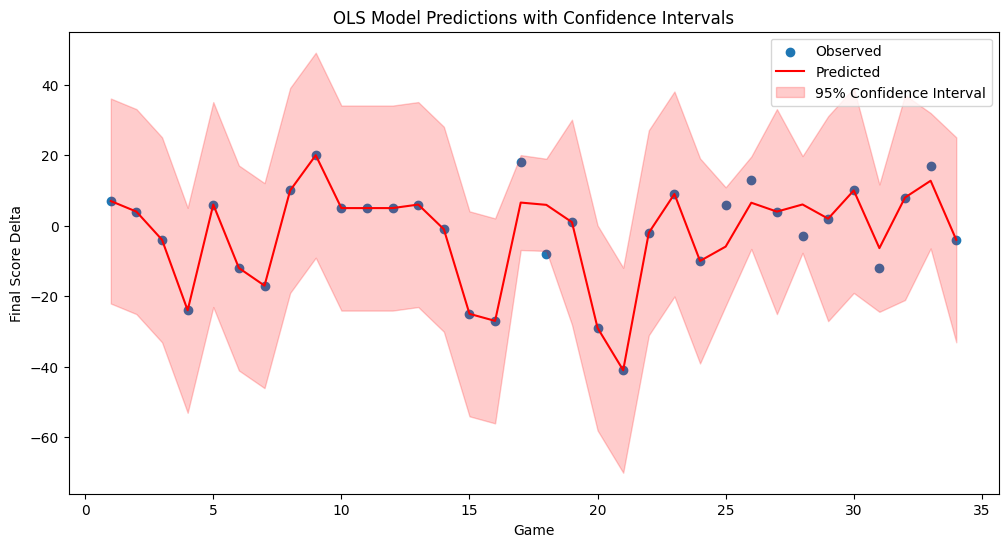

In [ ]:
# prompt: print a scatter plot of the OLS model that includes confidence interval bands with the x axis being the index Game

import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming 'results' from your OLS model is available

# Predict values with confidence intervals
predictions = results.get_prediction(X)
predicted_mean = predictions.predicted_mean
confidence_interval = predictions.conf_int(alpha=0.05)  # 95% confidence interval

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(y.index, y['Final_Score_Delta'], label='Observed')
ax.plot(y.index, predicted_mean, color='red', label='Predicted')
ax.fill_between(y.index, confidence_interval[:, 0], confidence_interval[:, 1], alpha=0.2, color='red', label='95% Confidence Interval')

ax.set_xlabel('Game')
ax.set_ylabel('Final Score Delta')
ax.set_title('OLS Model Predictions with Confidence Intervals')
ax.legend()

plt.show()

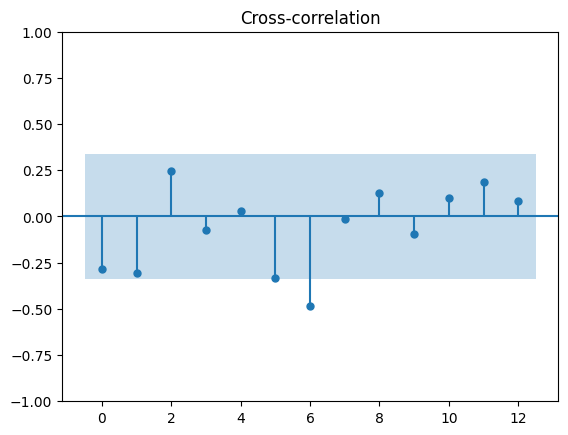

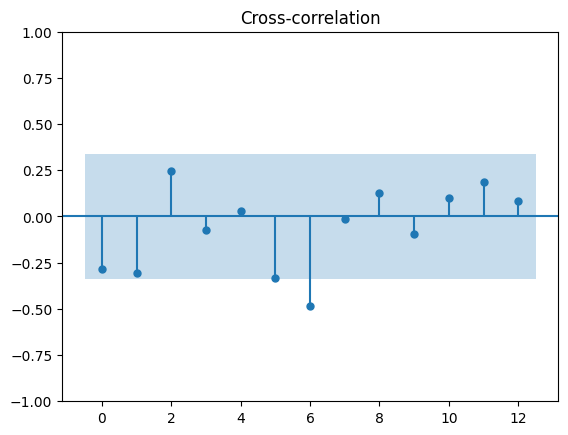

In [ ]:

import statsmodels.graphics.tsaplots as tsaplots

tsaplots.plot_ccf(y, X['TEAM_1610612753'], lags=12)

In [ ]:
train_size = int(len(y) * 0.8)  # 80% for training
train_y, test_y = y[:train_size], y[train_size:]
train_X, test_X = X[:train_size], X[train_size:]

model = OLS(train_y, train_X) # Train on training data
results = model.fit()

# Print model summary
print(results.summary())

# Predict on test set
predictions = results.get_prediction(test_X)
predicted_mean = predictions.predicted_mean
confidence_interval = predictions.conf_int(alpha=0.05)



                                 OLS Regression Results                                
Dep. Variable:      Final_Score_Delta   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.196
Method:                 Least Squares   F-statistic:                              1.264
Date:                Tue, 07 Jan 2025   Prob (F-statistic):                       0.536
Time:                        23:53:07   Log-Likelihood:                         -74.063
No. Observations:                  27   AIC:                                      198.1
Df Residuals:                       2   BIC:                                      230.5
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

Mean Squared Error: 186.15649540114964


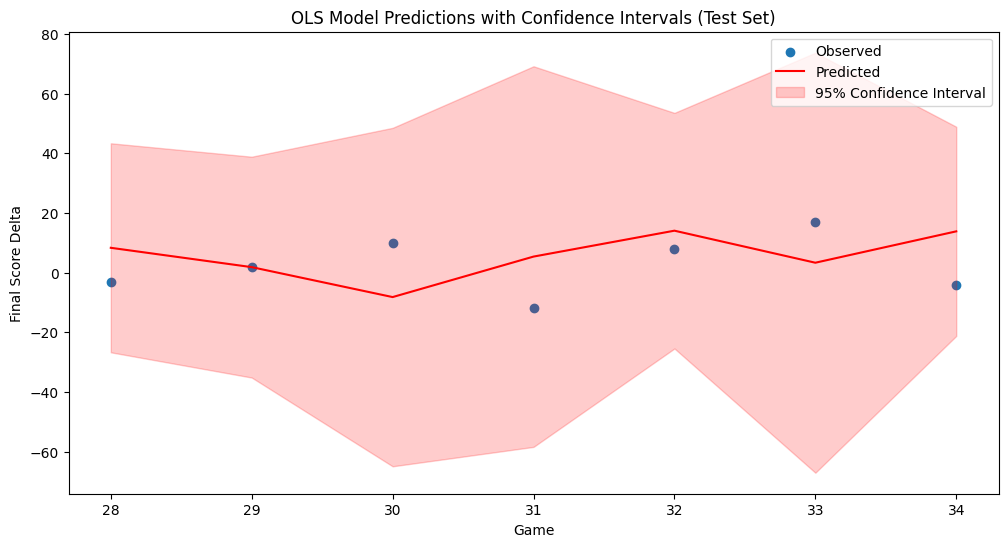

In [ ]:
# Evaluate the model on the test set (example: Mean Squared Error)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predicted_mean)
print(f"Mean Squared Error: {mse}")

fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(test_y.index, test_y['Final_Score_Delta'], label='Observed')
ax.plot(test_y.index, predicted_mean, color='red', label='Predicted')
ax.fill_between(test_y.index, confidence_interval[:, 0], confidence_interval[:, 1], alpha=0.2, color='red', label='95% Confidence Interval')

ax.set_xlabel('Game')
ax.set_ylabel('Final Score Delta')
ax.set_title('OLS Model Predictions with Confidence Intervals (Test Set)')
ax.legend()

plt.show()

# Drop Interacting variables

In [ ]:
columns_to_drop = [col for col in train_X.columns if 'HomexTEAM_' in col]
train_X = train_X.drop(columns=columns_to_drop)
test_X = test_X.drop(columns=columns_to_drop)

In [ ]:
model = OLS(train_y, train_X) # Train on training data
results = model.fit()

# Print model summary
print(results.summary())

# Predict on test set
predictions = results.get_prediction(test_X)
predicted_mean = predictions.predicted_mean
confidence_interval = predictions.conf_int(alpha=0.05)

                                 OLS Regression Results                                
Dep. Variable:      Final_Score_Delta   R-squared (uncentered):                   0.762
Model:                            OLS   Adj. R-squared (uncentered):              0.082
Method:                 Least Squares   F-statistic:                              1.121
Date:                Wed, 08 Jan 2025   Prob (F-statistic):                       0.469
Time:                        00:11:22   Log-Likelihood:                         -92.768
No. Observations:                  27   AIC:                                      225.5
Df Residuals:                       7   BIC:                                      251.5
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

Mean Squared Error: 217.0420577791248


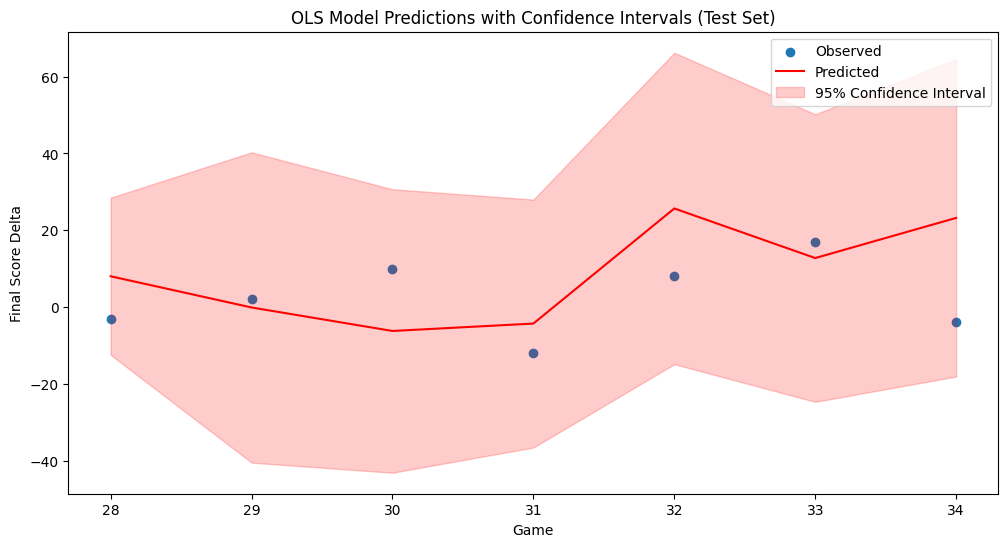

In [ ]:
mse = mean_squared_error(test_y, predicted_mean)
print(f"Mean Squared Error: {mse}")

fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(test_y.index, test_y['Final_Score_Delta'], label='Observed')
ax.plot(test_y.index, predicted_mean, color='red', label='Predicted')
ax.fill_between(test_y.index, confidence_interval[:, 0], confidence_interval[:, 1], alpha=0.2, color='red', label='95% Confidence Interval')

ax.set_xlabel('Game')
ax.set_ylabel('Final Score Delta')
ax.set_title('OLS Model Predictions with Confidence Intervals (Test Set)')
ax.legend()

plt.show()